In [11]:
import sys
import os
import torch as th
import pandas as pd
import atomium
import seaborn as sns

sys.path.append('/home/users/kkaminski/apps_common/')
sys.path.append('/home/users/kkaminski')
import graph_toolbox as gt
import graph_local_emb as gle

No module named 'bio_embeddings'
calc_embeddings is not available


/home/users/kkaminski/anaconda3/envs/mutv/lib/python3.9/site-packages/torch/jit/annotations.py:289: UserWarning: TorchScript will treat type annotations of Tensor dtype-specific subtypes as if they are normal Tensors. dtype constraints are not enforced in compilation either.
  warnings.warn("TorchScript will treat type annotations of Tensor "


In [2]:
p1 = '/home/users/kkaminski/apps_common/graph_toolbox/feature/data/10mh_A.pdb'
p2 = '/home/users/kkaminski/apps_common/graph_toolbox/feature/data/1a5z_A.pdb'

In [3]:
r1 = gt.parse.read_pdb_full(p1)
r2 = gt.parse.read_pdb_full(p2)

In [4]:
ca1 = th.from_numpy(r1[-2])
ca2 = th.from_numpy(r2[-2])

In [5]:
cad1 = th.cdist(ca1, ca1).unsqueeze(0).unsqueeze(0)
cad2 = th.cdist(ca2, ca2).unsqueeze(0).unsqueeze(0)

In [6]:
num_res1 = cad1.shape[-1]
num_res2 = cad2.shape[-1]

In [7]:
cac2_int = th.nn.functional.interpolate(cad2, size=(num_res1, num_res1))

<AxesSubplot:>

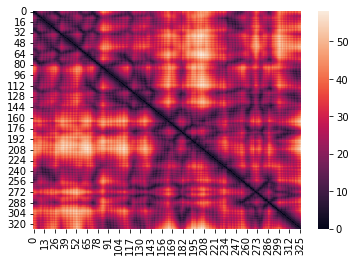

In [8]:
sns.heatmap(cac2_int.squeeze().numpy())

In [18]:
dens2d = gle.density.get_multires_density(cad1.squeeze(), cac2_int.squeeze(), kernels=[1, 5, 11, 21], raw=True)

<AxesSubplot:>

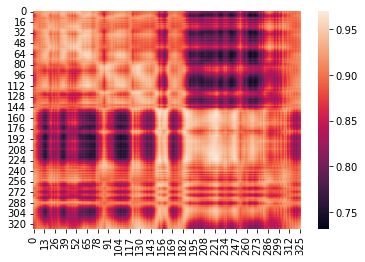

In [25]:
sns.heatmap(dens2d[0])

In [ ]:
sns.heatmap(dens2d[1])